Project is based on Solar elctric programs.

The source URL for the data is https://data.ny.gov/Energy-Environment/Solar-Electric-Programs-Reported-by-NYSERDA-Beginn/3x8r-34rs.


Questions:

1. Which areas have most projects implemented?
2. Are profit/incentive and cost of project proportinal? 
3. Is the expected power delivered by the project?
4. Which grids are mostly profitable by these projects? 

Answers:
    1. Most of the projects are implemented in Suffolk county
    2. Yes in many cases but there are some anomolies
    3. Yes for maximum cases
    4. Consolidated Edison,PSEG Long Island and National Grid uses almost 75 to 80 % of power generated

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime

In [5]:
df = pd.read_csv('Solar_Electric_Programs_Reported_by_NYSERDA__Beginning_2000.csv')

In [6]:
df.shape

(95171, 30)

In [7]:
df.describe()

,Zip Code,Total Inverter Quantity,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production
count,95171.000000,91102.000000,91128.000000,9.498200e+04,9.512900e+04,95171.000000,9.517100e+04
mean,11900.437129,8.770115,74.177509,7.031850e+04,1.303230e+04,24.413321,2.847286e+04
std,1111.681532,15.503587,601.951776,3.766022e+05,7.434595e+04,208.177049,2.430383e+05
min,501.000000,1.000000,1.000000,1.500000e+02,0.000000e+00,0.000000,0.000000e+00
25%,11207.000000,1.000000,18.000000,2.246400e+04,1.876000e+03,5.100000,5.987000e+03
50%,11755.000000,1.000000,26.000000,3.160000e+04,3.397000e+03,7.050000,8.276000e+03
75%,12491.000000,14.000000,36.000000,4.470900e+04,7.325000e+03,9.900000,1.162100e+04
max,14905.000000,800.000000,22400.000000,2.267184e+07,2.980270e+06,7549.360000,8.861741e+06


In [8]:
df

,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,...,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1
0,02/28/2019,4736-53261-GJ,Nanuet,Rockland,NY,10954,Residential,Residential/Small Commercial,PON 2112,Orange and Rockland Utilities,...,25.0,29650.00,6300.00,7.00,8217.0,No,No,No,Residential,"Nanuet, NY 10954\n(41.100807, -74.012827)"
1,02/28/2019,4741-36008,Staten Island,Richmond,NY,10309,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,36.0,44085.60,12168.00,9.36,10987.0,No,No,No,NaN,"Staten Island, NY 10309\n(40.532063, -74.215396)"
2,02/28/2019,4712-29553,New Rochelle,Westchester,NY,10805,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,24.0,33371.10,8640.00,5.76,6761.0,NaN,No,No,NaN,"New Rochelle, NY 10805\n(40.898088, -73.779264)"
3,02/28/2019,4736-76129,Amherst,Erie,NY,14228,Residential,Residential/Small Commercial,PON 2112,National Grid,...,35.0,38325.00,5250.00,10.50,12325.0,No,No,No,Residential,"Amherst, NY 14228\n(43.03041, -78.793874)"
4,02/28/2019,4728-29706,Troy,Rensselaer,NY,12180,Residential,Residential/Small Commercial,PON 2112,National Grid,...,20.0,35797.00,9810.00,6.54,7677.0,NaN,No,No,NaN,"Troy, NY 12180\n(42.736751, -73.637848)"
5,02/28/2019,4728-29074,New Paltz,Ulster,NY,12561,Residential,Residential/Small Commercial,PON 2112,Central Hudson Gas and Electric,...,32.0,49810.00,10500.00,10.46,12283.0,NaN,No,No,NaN,"New Paltz, NY 12561\n(41.74664, -74.094011)"
6,02/28/2019,4734-25895,Hartsdale,Westchester,NY,10530,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,18.0,26436.60,4129.69,3.42,4015.0,NaN,No,No,NaN,"Hartsdale, NY 10530\n(41.022687, -73.8086)"
7,02/28/2019,4736-52861-GJ,Walden,Orange,NY,12586,Residential,Residential/Small Commercial,PON 2112,NYS Electric and Gas,...,77.0,61408.00,19058.00,21.56,25308.0,No,No,No,Residential,"Walden, NY 12586\n(41.563126, -74.174903)"
8,02/28/2019,4741-33600,Staten Island,Richmond,NY,10314,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,18.0,24387.30,6174.00,4.41,5177.0,NaN,No,No,NaN,"Staten Island, NY 10314\n(40.604049, -74.152798)"
9,02/28/2019,4718-44841,Spring Valley,Rockland,NY,10977,Residential,Residential/Small Commercial,PON 2112,Orange and Rockland Utilities,...,54.0,48600.00,13500.00,13.50,15847.0,No,No,No,NaN,"Spring Valley, NY 10977\n(41.116859, -74.047476)"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95171 entries, 0 to 95170
Data columns (total 30 columns):
Reporting Period                         95171 non-null object
Project Number                           95171 non-null object
City                                     95171 non-null object
County                                   95171 non-null object
State                                    95171 non-null object
Zip Code                                 95171 non-null int64
Sector                                   95171 non-null object
Program Type                             95171 non-null object
Solicitation                             95171 non-null object
Electric Utility                         95171 non-null object
Purchase Type                            90061 non-null object
Date Application Received                95171 non-null object
Date Completed                           91156 non-null object
Project Status                           95171 non-null object
Contractor

***Data cleaning***

In [10]:
#coloums which are same for every entry
df1 = df.drop(['State','Reporting Period',] , axis = 1)

Dropping the cells as they are same for every coloumn 

In [11]:
#inaccuracy in data with more missing values
df2 = df1.drop(['Green Jobs Green New York Participant','Date Application Received','Date Completed','Remote Net Metering','PV Module Model Number','Total PV Module Quantity','Total Inverter Quantity','Primary Inverter Model Number','Zip Code','City','Contractor'], axis = 1)

In [12]:
#Finding the unique values
df2.nunique()

Project Number                      95165
County                                 62
Sector                                  2
Program Type                            3
Solicitation                           46
Electric Utility                        7
Purchase Type                           3
Project Status                          2
Primary Inverter Manufacturer         235
Primary PV Module Manufacturer        438
Project Cost                        45866
$Incentive                          17130
Total Nameplate kW DC                3775
Expected KWh Annual Production       4427
Affordable Solar                        2
Community Distributed Generation        2
Location 1                           2888
dtype: int64

In [13]:
# Finding the null values
df2.isnull().sum()

Project Number                         0
County                                 0
Sector                                 0
Program Type                           0
Solicitation                           0
Electric Utility                       0
Purchase Type                       5110
Project Status                         0
Primary Inverter Manufacturer       3986
Primary PV Module Manufacturer      3928
Project Cost                         189
$Incentive                            42
Total Nameplate kW DC                  0
Expected KWh Annual Production         0
Affordable Solar                       0
Community Distributed Generation       0
Location 1                            14
dtype: int64

dropping the cells with more than 50% of missing data and unnecessary data

In [11]:
df2['Primary Inverter Manufacturer'].replace('', np.nan, inplace=True)
df2.dropna(subset=['Primary Inverter Manufacturer','$Incentive'], inplace=True)
df2['Location 1'].replace(np.nan,'Unknown' , inplace=True)
df2['Primary PV Module Manufacturer'].replace(np.nan,'Unknown', inplace=True)
df2['Purchase Type'].replace(np.nan,'Unknown', inplace=True)
df2['Project Cost'].replace(np.nan,df2['Project Cost'].mean(), inplace=True)

Replacing all empty cells with nan values and dropping them.

Replacing empty loactions and manufacturer names to unknown to avoid further issues

Finding the mean of project costa and replacing that with the empty and nan values in the cells

In [12]:
# Checking the null values
df2.isnull().sum()

Project Number                      0
County                              0
Sector                              0
Program Type                        0
Solicitation                        0
Electric Utility                    0
Purchase Type                       0
Project Status                      0
Primary Inverter Manufacturer       0
Primary PV Module Manufacturer      0
Project Cost                        0
$Incentive                          0
Total Nameplate kW DC               0
Expected KWh Annual Production      0
Affordable Solar                    0
Community Distributed Generation    0
Location 1                          0
dtype: int64

In [13]:
# indicating the largest inverter manufacturer
df2['Primary Inverter Manufacturer'].value_counts().head(10)

SolarEdge Technologies         17478
Enphase Energy                 12898
SMA America                    11906
ABB                            10455
SunPower                        8885
SolarEdge Technologies Ltd.     6241
Power-One                       4577
Fronius USA                     4133
Enphase Energy Inc.             3384
Enphase En                      3062
Name: Primary Inverter Manufacturer, dtype: int64

In [14]:
# leading PV module Manufacturer
df2['Primary PV Module Manufacturer'].value_counts().head(10)

SunPower                              14279
Trina Solar                           11904
Canadian Solar                         6717
LG Electronics Solar Cell Division     6218
SolarWorld                             4170
REC Solar                              4029
Hanwha Q CELLS                         3787
LG Electronics                         3532
Hanwha Q-Cells                         3076
Trina Sola                             2769
Name: Primary PV Module Manufacturer, dtype: int64

Suffolk        14868
Nassau          8167
Queens          7617
Richmond        6828
Westchester     5821
Orange          5421
Dutchess        3292
Kings           3252
Rockland        3005
Ulster          2963
Name: County, dtype: int64


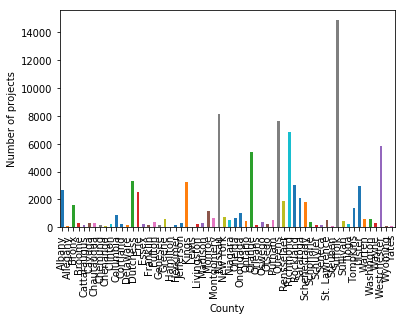

In [15]:
# largest county's using the solar programs
print(df2['County'].value_counts().head(10))
df2.groupby('County')['Project Number'].nunique().plot(kind='bar')
plt.ylabel('Number of projects')
plt.show()


Suffolk county has most number of projects undergoing

Residential/Small Commercial           90567
Commercial/Industrial (MW Block)         442
Commercial/Industrial (Competitive)      138
Name: Program Type, dtype: int64


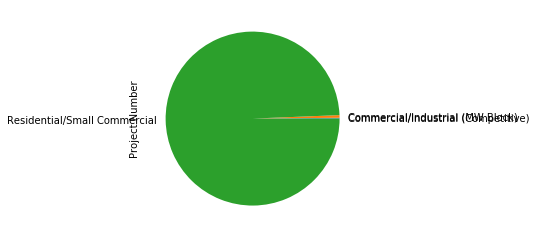

In [16]:
print(df2['Program Type'].value_counts())
df2.groupby('Program Type')['Project Number'].nunique().plot(kind='pie')

So, most of the projects are for Residential or small commercial. 

Is residential or small commercial have more projects??

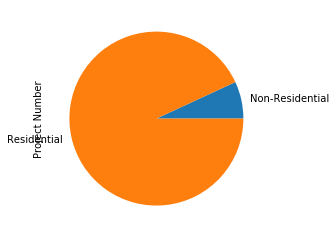

In [17]:
df2['Sector'].unique()
df2.groupby('Sector')['Project Number'].nunique().plot(kind='pie')

Hence Residential has around 90% of the projects where as the small commercial projects are around 8 to 9%.

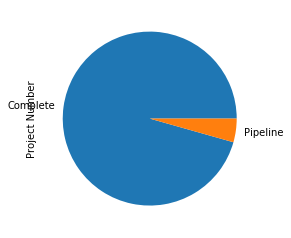

In [18]:
df2.groupby('Project Status')['Project Number'].nunique().plot(kind='pie')
plt.show()

So, almost 90% of the projects are completed and other are in pipeline



['Orange and Rockland Utilities' 'Consolidated Edison' 'National Grid'
 'Central Hudson Gas and Electric' 'NYS Electric and Gas'
 'PSEG Long Island' 'Rochester Gas and Electric']


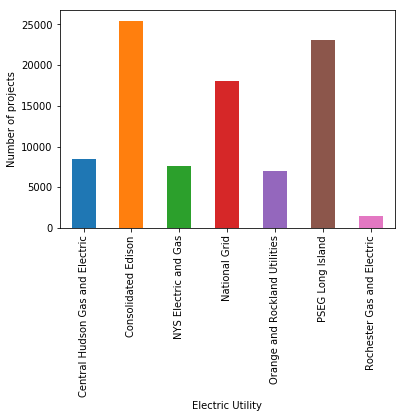

In [19]:
print(df2['Electric Utility'].unique())

df2.groupby('Electric Utility')['Project Number'].nunique().plot(kind='bar')
plt.ylabel('Number of projects')
plt.show()

The main prower grids using this power are Consolidated Edison,PSEG Long Island and National Grid almost 75% of the total projects which are in inplace

But, Are these venture affordable ?

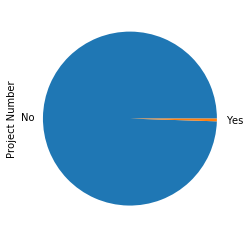

In [20]:
df2.groupby('Affordable Solar')['Project Number'].nunique().plot(kind='pie')
plt.show()

So, most of the projects are not affordable

As they are not affordable , can a community own them ??

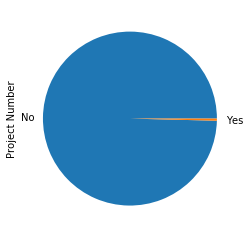

In [21]:
#print(df2['Community Distributed Generation'].value_counts())
df2.groupby('Community Distributed Generation')['Project Number'].nunique().plot(kind='pie')
plt.show()

maximum Coummunities can't own them as they are not affordable

So, major number of projects are under PON 2112 and PON 2112LI.

In [22]:
df2['Solicitation'].value_counts()

PON 2112                                          64010
PON 2112LI                                        14390
Solar Pioneer Leasing                              3906
Solar Pioneer                                      3506
PON 1050                                           2222
PON 716                                            1238
Solar ARRA Funding                                  461
PON 3082                                            442
Solar Municipal                                     250
Solar Entreprenuer                                  226
SPLR                                                100
Solar Pioneer 2014                                   66
GJGNY-OBR-15-349                                     63
PON 2589C                                            49
PON 2156                                             37
Solar ARRA                                           34
PON 2956                                             25
Solar Pioneer Leasing 2014                      

<function matplotlib.pyplot.show(*args, **kw)>

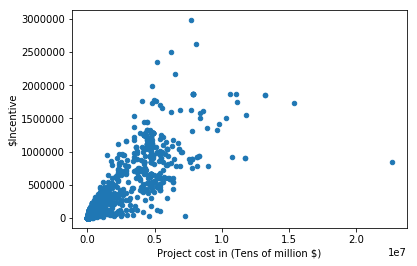

In [23]:
df2.plot.scatter(x='Project Cost',y='$Incentive')
plt.xlabel('Project cost in (Tens of million $)')
plt.show

So,if the investment in the project is high then the incentive will be high

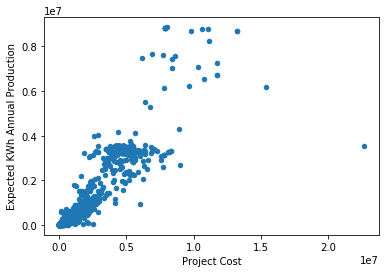

In [24]:
df2.plot.scatter(x='Project Cost',y='Expected KWh Annual Production')

So,with project cost increases the annual production of production

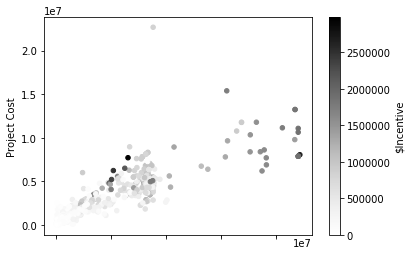

In [25]:
df2.plot.scatter(x='Expected KWh Annual Production',y='Project Cost',c='$Incentive')

**So, incentive is increased with the production cost, there are some cases where the production is less as well as project cost but incenitve is high. I guess that is in a place where electricity has huge demand.**

Is the power obtained is equal to nameplate power ??

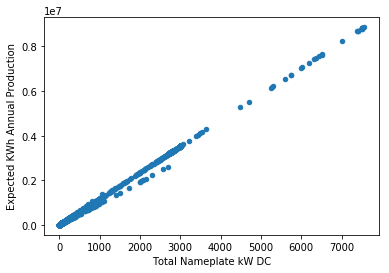

In [26]:
df2.plot.scatter(x='Total Nameplate kW DC',y='Expected KWh Annual Production')
plt.show()

*Yeah it's almost equal as the most of the graph is in a straight line indicating that obtained power is almost equal to expected power*

Things i learn't from this are :
1. Data cleaning can be done in several ways , choose the best one
2. Selecting the parameters you would like to work on is bit tricky so, start early
3. The whole usage of solar powered projects are mainly in a couple of areas.
4. Profit is not always based on the investment so, choose your goal and area of work smartly in life.